# EIS Anlaysis Board 🧮

## Set up the environment 🔌

AutoEIS relies on `EquivalentCircuits.jl` package to perform the EIS analysis. The package is not written in Python, so we need to install it first. AutoEIS ships with `julia_helpers` module that helps to install and manage Julia dependencies with minimal user interaction. The only thing you need to do is to run `autoeis.julia_helpers.install()`, and everything will be taken care of. You only need to do this once.

In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import autoeis as ae
from autoeis import julia_helpers

ae.visualization.set_plot_style()

PATH_TESTDATA = "assets/test_data.csv"
PATH_EXPORT = "results"

# If Julia executable not in PATH, add it here (not needed if you use `juliaup` to install Julia)
# julia_helpers.add_julia_to_PATH(PATH_TO_JULIA_BIN_DIR)

# Uncomment this line if you are running the code for the first time
# julia_helpers.install()

## Load EIS data 📈

Once the environment is set up, we can load the EIS data. AutoEIS supports loading data in the following formats: CSV, TXT, JSON, XLSX, and PKL. Your file must contain at least the following columns: frequency, real, and imaginary parts of impedance measurements.

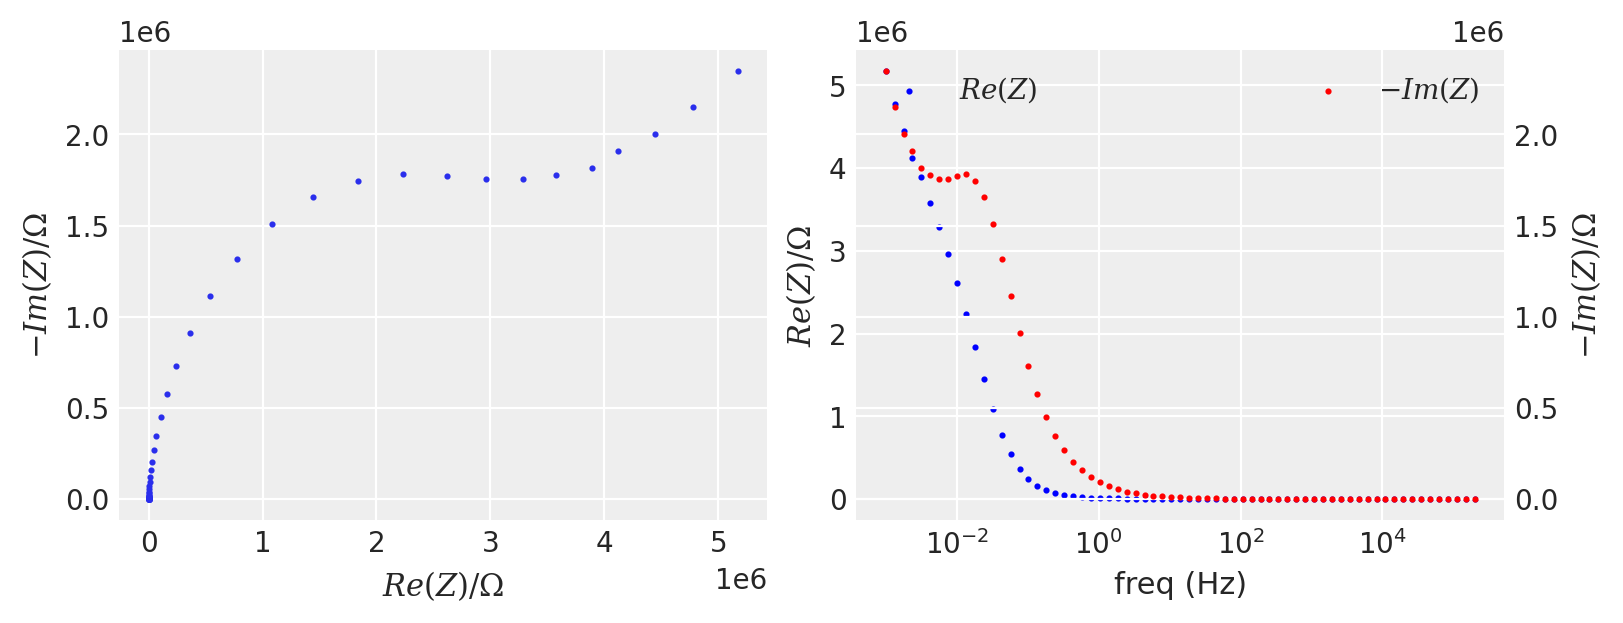

In [2]:
df = ae.io.load_eis_data(PATH_TESTDATA)

freq = np.array(df["freq/Hz"]).astype(float)
reals = np.array(df["Re(Z)/Ohm"]).astype(float)
imags = -np.array(df["-Im(Z)/Ohm"]).astype(float)

Z = reals + imags*1j

ae.visualization.plot_impedance(Z, freq);

## EIS analysis 🪄

In [9]:
kwargs = {"iters": 10, "saveto": PATH_EXPORT, "plot": False, "parallel": True}
results = ae.perform_full_analysis(Z, freq, **kwargs)

[23:02:48] WARNING  Default threshold (0.05) dropped too many points.                                   ]8;id=502794;file:///home/amin/Code/AutoEIS/autoeis/core.py\core.py]8;;\:]8;id=820654;file:///home/amin/Code/AutoEIS/autoeis/core.py#218\218]8;;\

Circuit Evolution:   0%|          | 0/10 [00:00<?, ?it/s]